In [5]:
import geopandas as gp

In [6]:
hd_difference = gp.read_file("inputs/Heidelberg_difference.json")
hd_difference.head()

,id,index,pop_density,population,difference_self0,difference_self1,difference_self2,difference_self3,difference_self4,difference_self5,...,difference_self15,difference_self16,difference_self17,difference_self18,difference_self19,difference_self20,difference_self21,difference_self22,difference_self23,geometry
0,891fae6db2fffff,12960,0.0,0.0,0.000000,0.0,0.0,1.722581,12.638821,20.935597,...,20.416667,22.676923,20.902265,20.582927,21.808901,24.627160,25.629464,24.812808,18.964401,"POLYGON ((8.61057 49.36374, 8.61303 49.36314, ..."
1,891faad665bffff,12960,0.0,0.0,0.000000,0.0,0.0,2.028571,12.783410,20.795053,...,20.233100,22.973934,20.706235,20.393865,21.638522,24.590799,25.290249,24.776722,18.737179,"POLYGON ((8.61303 49.36314, 8.61527 49.36422, ..."
2,891fae6db3bffff,12960,0.0,0.0,0.923841,0.0,0.0,3.038710,14.176334,21.130435,...,20.778679,22.736591,20.919952,20.416361,21.793923,25.681128,25.418750,25.054920,18.741722,"POLYGON ((8.60317 49.36553, 8.60564 49.36493, ..."
3,891fae6db23ffff,12960,0.0,0.0,0.376947,0.0,0.0,2.009231,12.696703,21.407448,...,21.341102,23.008743,21.857296,21.404682,22.089639,28.786780,28.728682,28.529284,22.065421,"POLYGON ((8.60564 49.36493, 8.60787 49.36602, ..."
4,891fae6db27ffff,12960,0.0,0.0,0.197531,0.0,0.0,1.914373,12.486842,21.130913,...,20.930407,23.085271,21.280394,21.019209,21.836299,27.388286,27.539841,27.263858,20.771605,"POLYGON ((8.61258 49.36651, 8.61504 49.36591, ..."


In [8]:
hd_difference.explore(column='difference_self17', cmap='magma_r')

ImportError: The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. You can install them using 'conda install -c conda-forge folium matplotlib mapclassify' or 'pip install folium matplotlib mapclassify'.

/tmp/ipykernel_3707/3446594432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot["id"] = hd_difference["id"]


<Axes: xlabel='Time of Day [h]', ylabel='Difference in Travel Time [min]'>

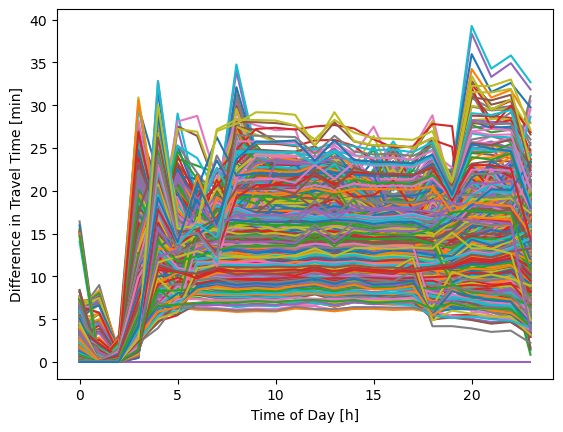

In [9]:
pivot = hd_difference.loc[:, hd_difference.columns.str.startswith("difference")]
pivot["id"] = hd_difference["id"]
plots = pivot.set_index("id").transpose().reset_index()
plots.plot(legend=False, xlabel="Time of Day [h]", ylabel="Difference in Travel Time [min]")

TODO: box plot für planning indicator, per district of heidelberg

: 